## Introducing plotly.py 3.3.0
In this notebook we introduce some of the exciting new features in plotly.py version 3.3.0.  Please refer to the project [README](https://github.com/plotly/plotly.py#installation) for installation instructions. Now let's get started!

In [140]:
# Imports
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import ipywidgets as widgets

In [141]:
# Uncomment for use in classic notebook
# init_notebook_mode()

### Polar bar-char trace type
Plotly.js version 1.41 introduces a new `barpolar` trace type for creating bar charts in polar coordinates. The popular [Wind Rose](https://en.wikipedia.org/wiki/Wind_rose) chart type can now be easily created as a collection of stacked `barpolar` traces.

Figures with `barpolar` traces support rich interactions including polar-specific zoom, click-and-drag axis rotation, and lasso selection.

![](barpolar_interactions.gif)

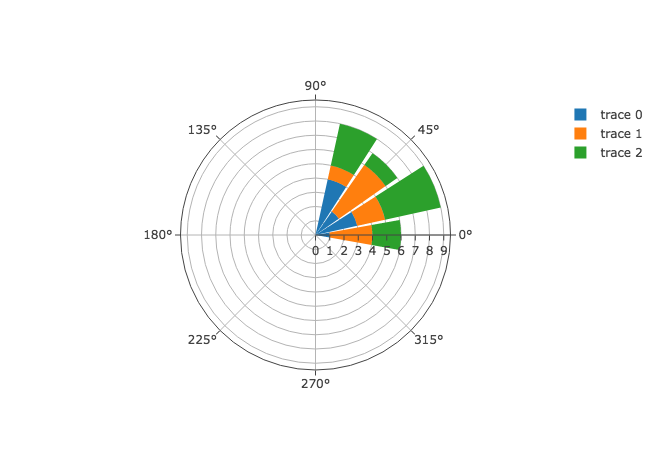

In [109]:
theta = [0, 22.5, 45, 67.5, 90]
fig1 = go.Figure(data=[
    go.Barpolar(theta=theta, r=[1, 3, 2, 4]),
    go.Barpolar(theta=theta, r=[3, 2, 4, 1]),
    go.Barpolar(theta=theta, r=[2, 4, 1, 3])
])
iplot(fig1)

When displayed in the notebook using a `FigureWidet`, you can also build `barpolar` traces interactively

![](barpolar_widget.gif)

In [119]:
fig2 = go.FigureWidget()
fig2

FigureWidget({
    'data': [], 'layout': {}
})

In [120]:
bar0 = fig2.add_barpolar(theta=theta, r=[1, 3, 2, 4])

In [121]:
bar1 = fig2.add_barpolar(theta=theta, r=[3, 2, 4, 1])

In [122]:
bar2 = fig2.add_barpolar(theta=theta, r=[2, 4, 1, 3])

A new `layout.polar.hole` attribute has been added to bunch a hold in the middle of a polar subplots

In [123]:
fig2.layout.polar.hole = 0.2

In [124]:
fig2.layout.polar.angularaxis.rotation = 12.5

In [125]:
fig2.layout.polar.sector = [-10, 100]

You can even register Python functions to execute in response to click, hover, and selection events!
Let's display the indexes of selected `bar2` points in an ipywidgets output widget

![](barpolar_selection.gif)

In [127]:
out = widgets.Output()
def do_selection(trace, points, state):
    out.clear_output()
    with out:
        print(points.point_inds)

bar2.on_selection(do_selection)
widgets.VBox([fig2, out])

    'data': [{'r': [1, 3, 2, 4],
              'theta': [0, 22.5, 45, 67.5, 90],…

### Selection by click
A new click selection mode has been introduced, allowing a point to be selected with a single click. Existing selections may also be extended by holding the shift key during click.  For example, lets enable click selection on our barpolar `FigureWidget` above.

![](barpolar_click_selection.gif)

In [128]:
fig2.layout.clickmode = 'event+select'

In [129]:
widgets.VBox([fig2, out])

    'data': [{'r': [1, 3, 2, 4],
              'theta': [0, 22.5, 45, 67.5, 90],…

### Stacked Area Traces
Stacked area traces are now directly supported by setting the new `scatter.stackgroup` property.  All scatter traces that share the same stack group will automatically stack on top of one another, without the need to manually calculate the cumulative sum.

![](stacked_area_widget.gif)

In [131]:
fig3 = go.FigureWidget()
fig3

FigureWidget({
    'data': [], 'layout': {}
})

In [132]:
x = [0, 1, 2, 3, 4]
scatt0 = fig3.add_scatter(x=x, y=[2, 1, 3, 4, 4])

In [133]:
scatt1 = fig3.add_scatter(x=x, y=[1, 3, 4, 4, 1])

In [134]:
scatt2 = fig3.add_scatter(x=x, y=[3, 4, 4, 1, 2])

In [135]:
scatt0.stackgroup = 'A'

In [136]:
scatt1.stackgroup = 'A'

In [137]:
scatt2.stackgroup = 'A'

### Read and write figures as JSON
The new `read_json`, `write_json`, `from_json`, and `to_json` methods in the `plotly.io` package make it easy to convert a figure to and from a JSON string representation with a single command.

The `plotly.io.to_json` function will convert a figure to a JSON string

In [142]:
import plotly.io as pio
print(pio.to_json(fig2, pretty=True))

{
  "data": [
    {
      "r": [
        1,
        3,
        2,
        4
      ],
      "theta": [
        0,
        22.5,
        45,
        67.5,
        90
      ],
      "type": "barpolar"
    },
    {
      "r": [
        3,
        2,
        4,
        1
      ],
      "theta": [
        0,
        22.5,
        45,
        67.5,
        90
      ],
      "type": "barpolar"
    },
    {
      "r": [
        2,
        4,
        1,
        3
      ],
      "theta": [
        0,
        22.5,
        45,
        67.5,
        90
      ],
      "type": "barpolar"
    }
  ],
  "layout": {
    "autosize": true,
    "clickmode": "event+select",
    "dragmode": "lasso",
    "polar": {
      "angularaxis": {
        "rotation": 12.5
      },
      "hole": 0.2,
      "sector": [
        -10,
        100
      ]
    }
  }
}


The `plotly.io.write_json` function will write the figure as a JSON string to a file or file-like object

In [139]:
pio.write_json(fig2, 'barpolar.plotly.json')

### Viewing plotly JSON files in JupyterLab
Thanks to the [`@jupyterlab/plotly-extension`](https://github.com/jupyterlab/jupyter-renderers/tree/master/packages/plotly-extension) JupyterLab extension, it's possible to open and interact with these `*.plotly.json` files from the file browser. No Python required.

![](save_view_json.gif)

### Odds and ends
While developing this release we did a full review of the entire plotly.py issue backlog, which resluted in a whole set of long-request fixes and improvements.

#### Other Added / Updated
 - Figures and graph objects now support `deepcopy` and `pickle` operations
 ([#1191](https://github.com/plotly/plotly.py/pull/1191))
 - The location of the `"~/.plotly"` settings directory may now be customized
 using the `PLOTLY_DIR` environment variable
 ([#1195](https://github.com/plotly/plotly.py/pull/1195))
 - Do not create or check permissions on the `~/.plotly` configuration
 directory until a configuration write operation is performed
 ([#1195](https://github.com/plotly/plotly.py/pull/1195)). This change
 avoids some concurrency problems associated with running many instances of
 plotly.py simultaneously
 ([#1068](https://github.com/plotly/plotly.py/issues/1068)).
 - Added optional `scaleratio` argument to the `create_quiver` figure factory.
 When specified, the axes are restricted to this ratio and the quiver arrows
 are computed to have consistent lengths across angles.
 ([#1197](https://github.com/plotly/plotly.py/pull/1197))
 
#### Fixed
 - Replace use of `pkg_resources.resource_string` with `pkgutil.get_data` to
 improve compatibility with `cx_Freeze`
 ([#1201](https://github.com/plotly/plotly.py/pull/1201))
 - An exception is no longer raised when an optional dependency raises an
 exception on import.  The exception is logged and plotly.py continues as if
 the dependency were not installed
 ([#1192](https://github.com/plotly/plotly.py/pull/1192))
 - Fixed invalid dendrogram axis labels when the points being clustered contain
 duplicate values
 ([#1186](https://github.com/plotly/plotly.py/pull/1186))
 - Added missing LICENSE.txt file to PyPI source distribution
 ([#765](https://github.com/plotly/plotly.py/issues/765))

## Looking Ahead - Latex labels in the notebook
Plotly.js has long supported Latex typesetting using MathJax, but it's never worked well in an offline environment or in the Jupyter Notebook. We've worked through the technical obstacles and anticipate that plotly.py version 3.4.0 will fully support offline MathJax Latex typesetting in the classic notebook, JupyterLab, standalone HTML files, and when exported to rastor/vector static images.

Here's a work-in-progress preview of what's to come
![](MathJax.gif)